In [35]:
# Load dataset
import pandas as pd

df = pd.read_csv(r"D:\toka\depi\challenge\Students_Grading_Dataset.csv", index_col=0)
pd.set_option("display.max_rows", 5)

In [36]:
df.head()

,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Student_ID,,,,,,,,,,,,,,,,,,,,,
S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, S1000 to S5999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   First_Name                  5000 non-null   object 
 1   Last_Name                   5000 non-null   object 
 2   Email                       5000 non-null   object 
 3   Gender                      5000 non-null   object 
 4   Age                         5000 non-null   int64  
 5   Department                  5000 non-null   object 
 6   Attendance (%)              4484 non-null   float64
 7   Midterm_Score               5000 non-null   float64
 8   Final_Score                 5000 non-null   float64
 9   Assignments_Avg             4483 non-null   float64
 10  Quizzes_Avg                 5000 non-null   float64
 11  Participation_Score         5000 non-null   float64
 12  Projects_Score              5000 non-null   float64
 13  Total_Score                 5000 

In [38]:
# Remove unnecessary features
df = df.drop(columns=["First_Name", "Last_Name", "Email"])

In [39]:
# Check missing values
print(df.isnull().sum())
# show all rows
pd.set_option('display.max_rows', None)

Gender                   0
Age                      0
                        ..
Stress_Level (1-10)      0
Sleep_Hours_per_Night    0
Length: 19, dtype: int64


In [40]:
# Check duplicates
print(df.duplicated().sum())

0


In [41]:
# Check unique values
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:", df[col].unique())


Unique values in Gender: ['Female' 'Male']
Unique values in Department: ['Engineering' 'Business' 'Mathematics' 'CS']
Unique values in Grade: ['F' 'A' 'D' 'B' 'C']
Unique values in Extracurricular_Activities: ['No' 'Yes']
Unique values in Internet_Access_at_Home: ['Yes' 'No']
Unique values in Parent_Education_Level: ['High School' nan "Master's" 'PhD' "Bachelor's"]
Unique values in Family_Income_Level: ['Medium' 'Low' 'High']


 The dataset doesn't have inconsistencies.

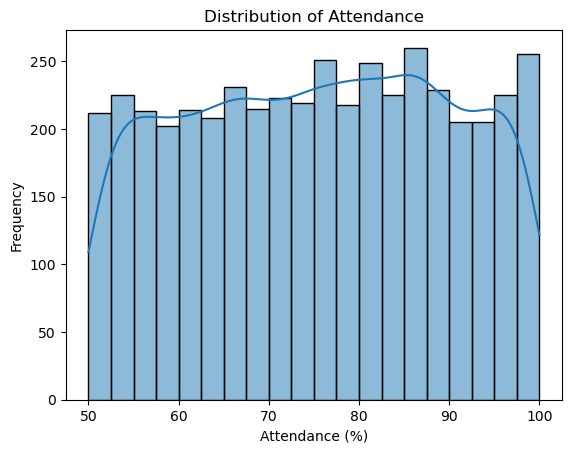

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Attendance (%) to see its distribution
sns.histplot(df['Attendance (%)'], bins=20, kde=True)
plt.title("Distribution of Attendance")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequency")
plt.show()

Uniform distribution

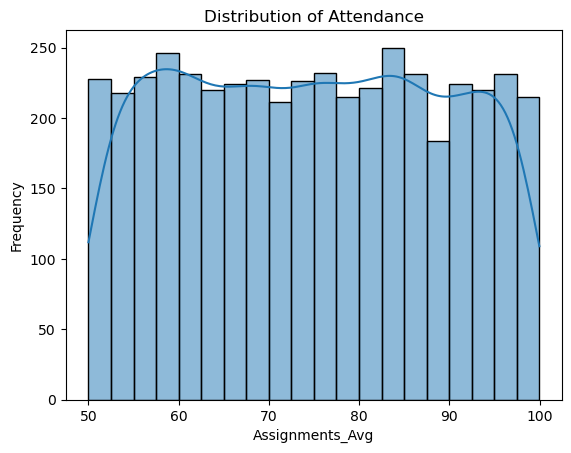

In [43]:
# Histogram of Assignments_Avg to see its distribution
sns.histplot(df['Assignments_Avg'], bins=20, kde=True)
plt.title("Distribution of Attendance")
plt.xlabel("Assignments_Avg")
plt.ylabel("Frequency")
plt.show()

Uniform distribution

In [44]:
# Handling missing values

# Filling missing values with median because their distributions is uniform
df['Attendance (%)'].fillna(df['Attendance (%)'].median(), inplace=True)
df['Assignments_Avg'].fillna(df['Assignments_Avg'].median(), inplace=True)

df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\3949458646.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance (%)'].fillna(df['Attendance (%)'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_3952\3949458646.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

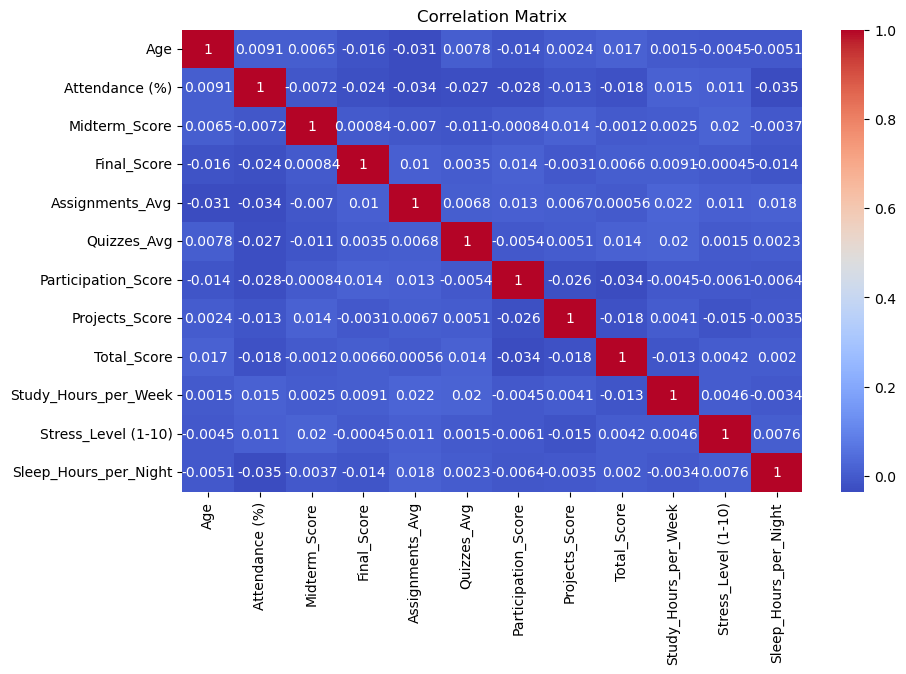

In [45]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

No high correlations, so I will not remove a feature.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\3222950546.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Department"], y=df["Total_Score"], ci=None, palette= "Set1")
C:\Users\hp\AppData\Local\Temp\ipykernel_3952\3222950546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Department"], y=df["Total_Score"], ci=None, palette= "Set1")


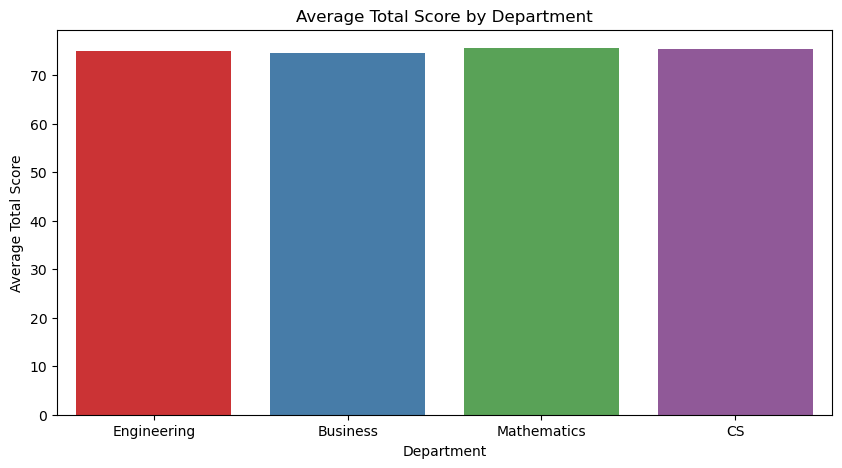

In [46]:
# Average total score by department
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Department"], y=df["Total_Score"], ci=None, palette= "Set1")
plt.title("Average Total Score by Department")
plt.xlabel("Department")
plt.ylabel("Average Total Score")
plt.show()

The average total scores for all departments are similar, indicating that students across different fields perform at a comparable level.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\1830649930.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Gender"], y=df["Total_Score"], ci=None, palette="Set2")
C:\Users\hp\AppData\Local\Temp\ipykernel_3952\1830649930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Gender"], y=df["Total_Score"], ci=None, palette="Set2")


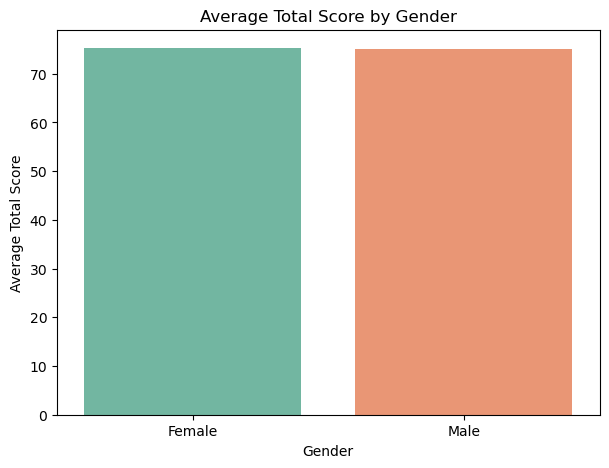

In [47]:
# Average total score by gender
plt.figure(figsize=(7, 5))
sns.barplot(x=df["Gender"], y=df["Total_Score"], ci=None, palette="Set2")
plt.title("Average Total Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Total Score")
plt.show()

The average total scores for both genders are similar, indicating that both of them perform at a comparable level.

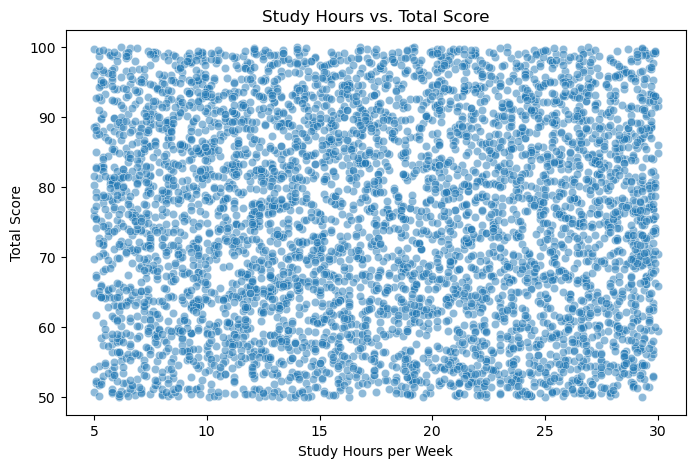

In [48]:
# Relationship between study hours and total score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Study_Hours_per_Week"], y=df["Total_Score"], alpha=0.5)
plt.title("Study Hours vs. Total Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Total Score")
plt.show()

Total score doesn't depend on Study hours, studying more hours does not always mean better performance.

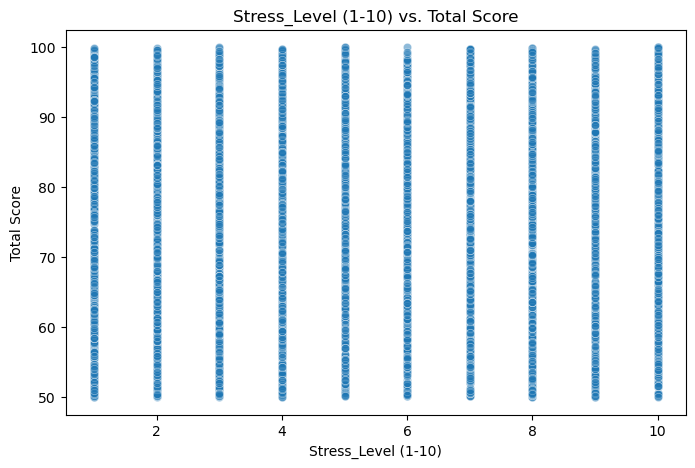

In [49]:
# Relationship between Stress_Level (1-10) and total score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Stress_Level (1-10)"], y=df["Total_Score"], alpha=0.5)
plt.title("Stress_Level (1-10) vs. Total Score")
plt.xlabel("Stress_Level (1-10)")
plt.ylabel("Total Score")
plt.show()

There's no relation between Stress level and Total Score. All students have stress with its all discrete values.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\3110655500.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Internet_Access_at_Home"], y=df["Total_Score"], ci=None, palette="Set3")
C:\Users\hp\AppData\Local\Temp\ipykernel_3952\3110655500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Internet_Access_at_Home"], y=df["Total_Score"], ci=None, palette="Set3")


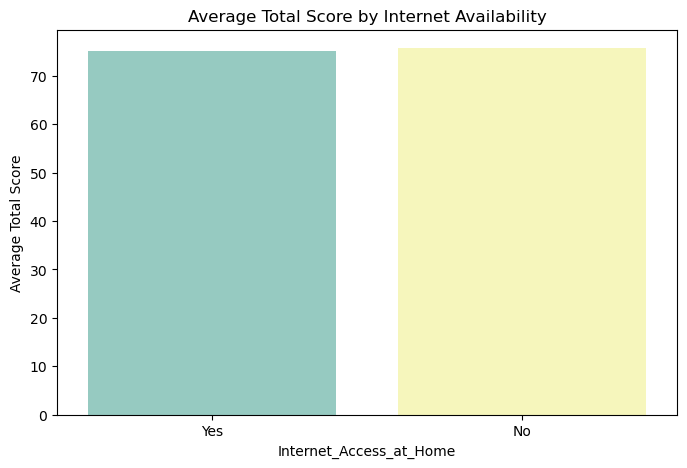

In [50]:
# Relation between internet access and total score
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Internet_Access_at_Home"], y=df["Total_Score"], ci=None, palette="Set3")
plt.title("Average Total Score by Internet Availability")
plt.xlabel("Internet_Access_at_Home")
plt.ylabel("Average Total Score")
plt.show()

Internet Access doesn't affect Total score

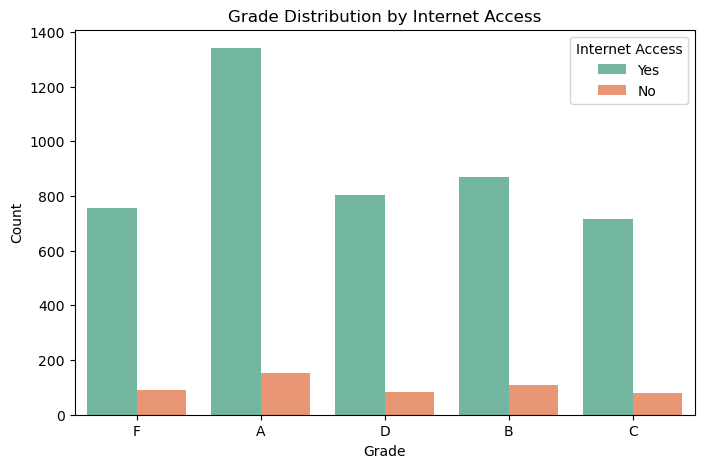

In [51]:
# Grade Distribution by Internet Access
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Grade'], hue=df['Internet_Access_at_Home'], palette="Set2")
plt.title("Grade Distribution by Internet Access")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Internet Access")
plt.show()

Most students have Internet Access. Most students with 'A' grade have Internet Access.

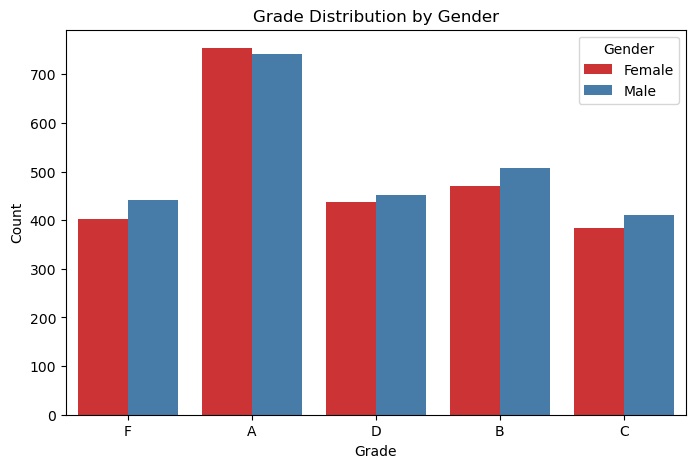

In [52]:
# Grade Distribution by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Grade'], hue=df['Gender'], palette="Set1")
plt.title("Grade Distribution by Gender")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


Highest Grade generally is 'A'. The distribution of grades is relatively balanced between genders. A slightly higher proportion of males received an 'F' compared to females.

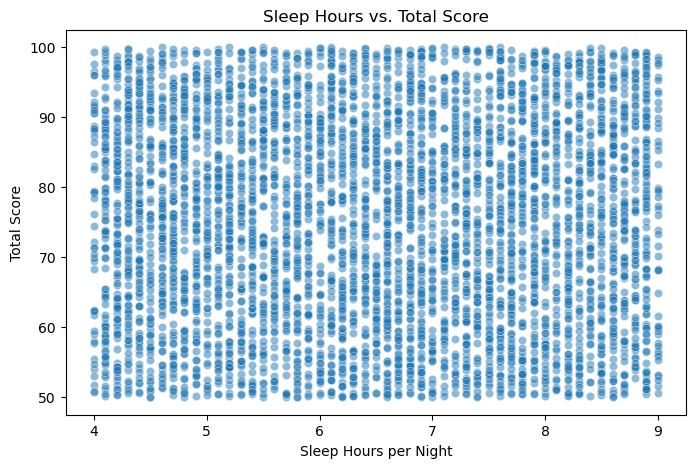

In [53]:
# Relationship between Sleep Hours and Average Total Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sleep_Hours_per_Night"], y=df["Total_Score"], alpha=0.5)
plt.title("Sleep Hours vs. Total Score")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Total Score")
plt.show()

There's no relation between Sleep Hours and Total Score.

There's no relation between Sleep Hours and Grades. The median sleep hours are around 6-7 hours. There's no outliers.

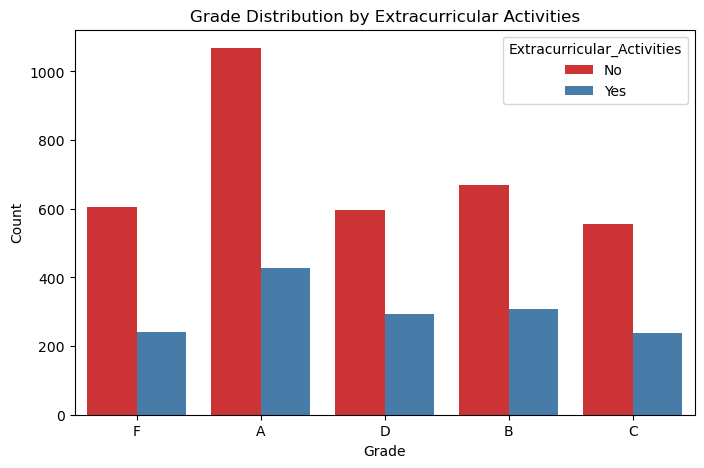

In [54]:
# Grade Distribution by Extracurricular_Activities
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Grade'], hue=df['Extracurricular_Activities'], palette="Set1")
plt.title("Grade Distribution by Extracurricular Activities")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Extracurricular_Activities")
plt.show()

Most students don't do Extracurricular Activities. The highest gap is for 'A' students.

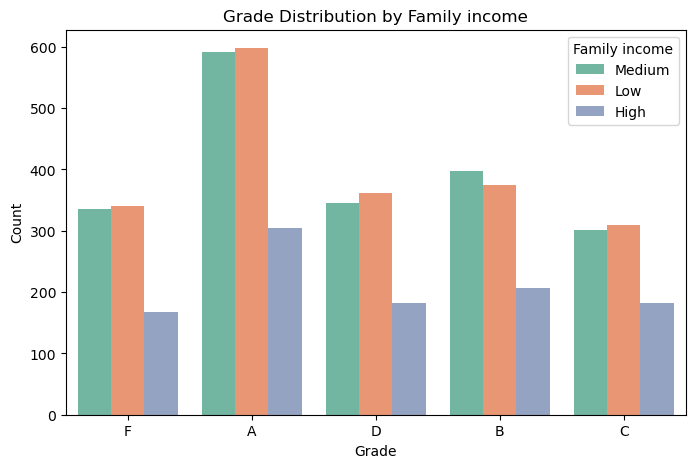

In [55]:
# Grade Distribution by Family income
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Grade'], hue=df['Family_Income_Level'], palette="Set2")
plt.title("Grade Distribution by Family income")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Family income")
plt.show()

Income level does not determine academic success. Medium-income and low-income students perform similarly. Most students with 'A' grade are from Mediun-income and Low-income.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\862449799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Department'], y=df['Study_Hours_per_Week'], palette="Set3")


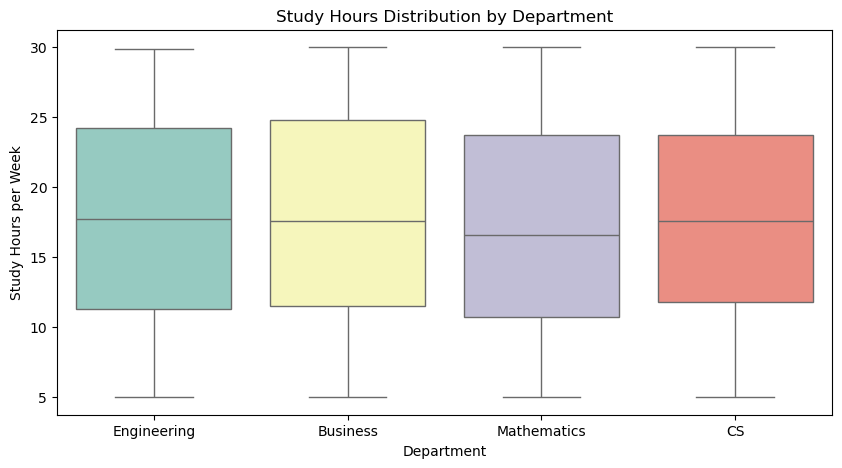

In [56]:
# Relationship between Study Hours and Department
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Department'], y=df['Study_Hours_per_Week'], palette="Set3")
plt.title("Study Hours Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Study Hours per Week")
plt.show()

Some students study as little as 5 hours per week, while others dedicate up to 30 hours with median about 15-17 hours a week, for all departments. There's no outliers. 

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\1341474478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Attendance (%)'], palette="Set1")


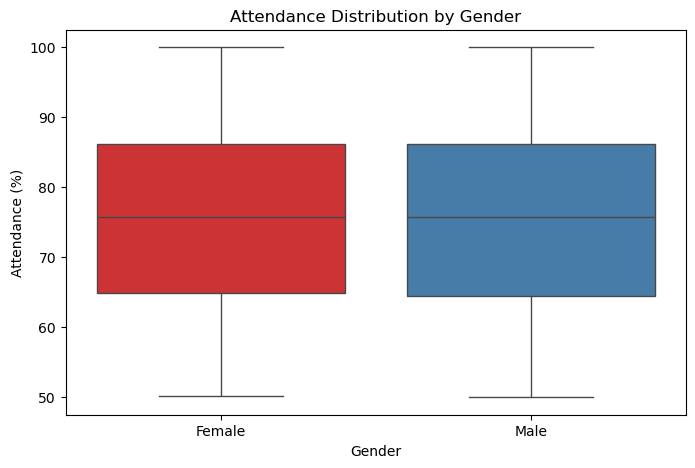

In [57]:
# Relationship between Attendance and Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Attendance (%)'], palette="Set1")
plt.title("Attendance Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Attendance (%)")
plt.show()

Attendance is balanced between both genders.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\85352211.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Department"], y=df["Attendance (%)"], ci=None, palette= 'Set3')
C:\Users\hp\AppData\Local\Temp\ipykernel_3952\85352211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Department"], y=df["Attendance (%)"], ci=None, palette= 'Set3')


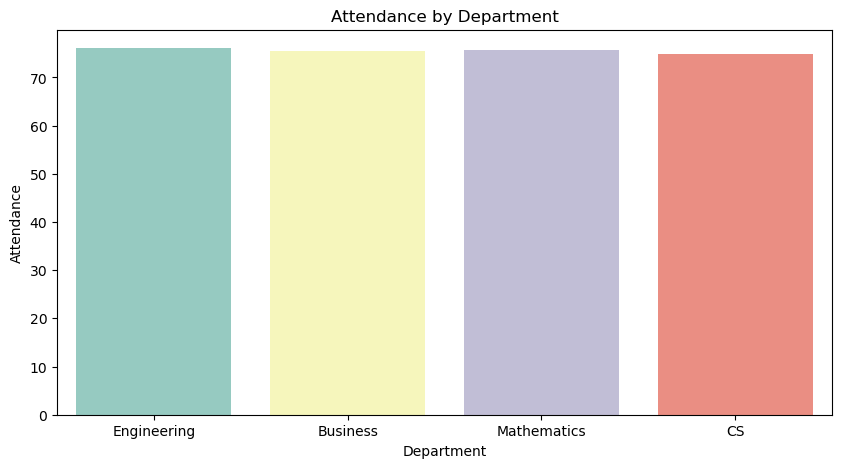

In [58]:
# Attendance by department
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Department"], y=df["Attendance (%)"], ci=None, palette= 'Set3')
plt.title("Attendance by Department")
plt.xlabel("Department")
plt.ylabel("Attendance")
plt.show()

Students from all departments have similar attendance behavior, with average attendace percentage (75 %)

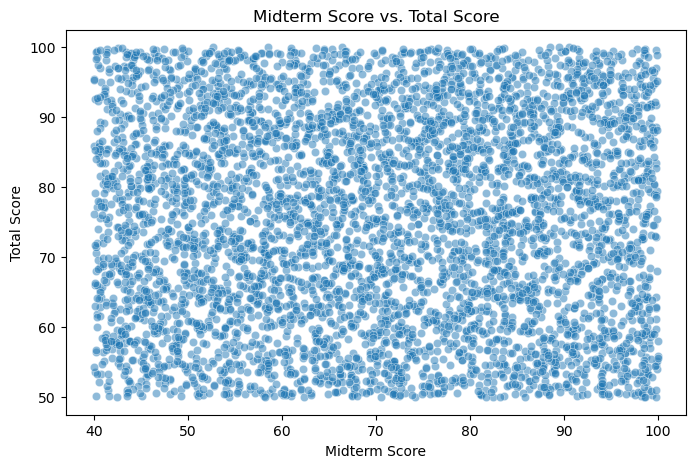

In [59]:
# Relationship between Midterm score and Total Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Midterm_Score"], y=df["Total_Score"], alpha=0.5)
plt.title("Midterm Score vs. Total Score")
plt.xlabel("Midterm Score")
plt.ylabel("Total Score")
plt.show()

There's no correlation between Midterm score and Total score, Midterm score doesn't have a significant effect on the Total score, low midterm score doesn't mean that the student will get a low Total score and vice versa.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\1690469311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Study_Hours_per_Week'], palette= 'Set2')


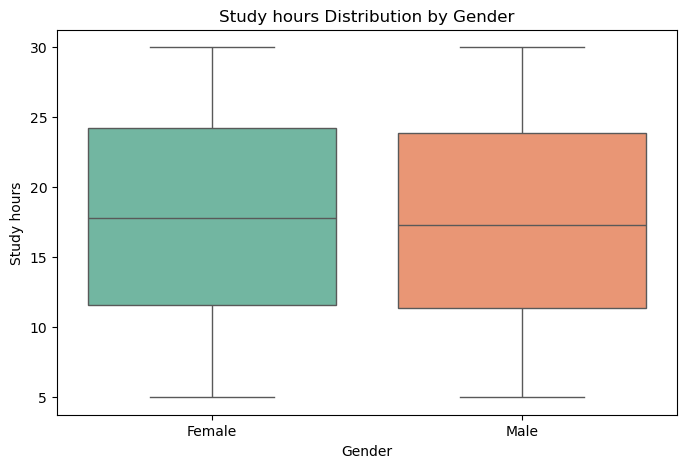

In [60]:
# Relationship between Study hours and Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Study_Hours_per_Week'], palette= 'Set2')
plt.title("Study hours Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Study hours")
plt.show()

There's no difference between genders in study hours.

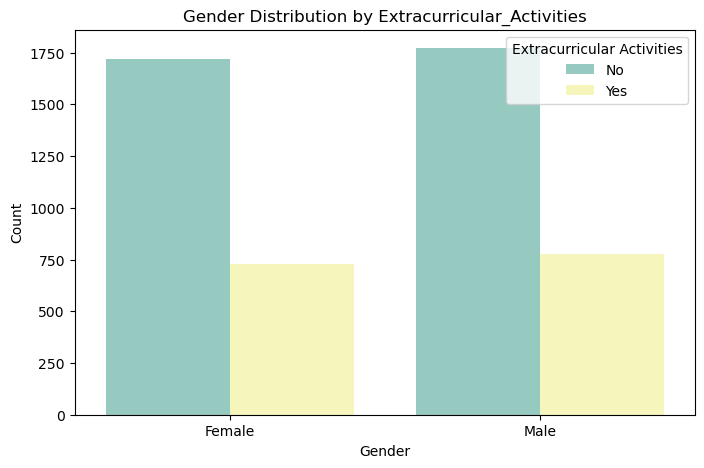

In [61]:
# Gender Distribution by Extracurricular_Activities
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Gender'], hue=df['Extracurricular_Activities'], palette="Set3")
plt.title("Gender Distribution by Extracurricular_Activities")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Extracurricular Activities")
plt.show()

Most of both males and females don't like to do Extracurricular activities.

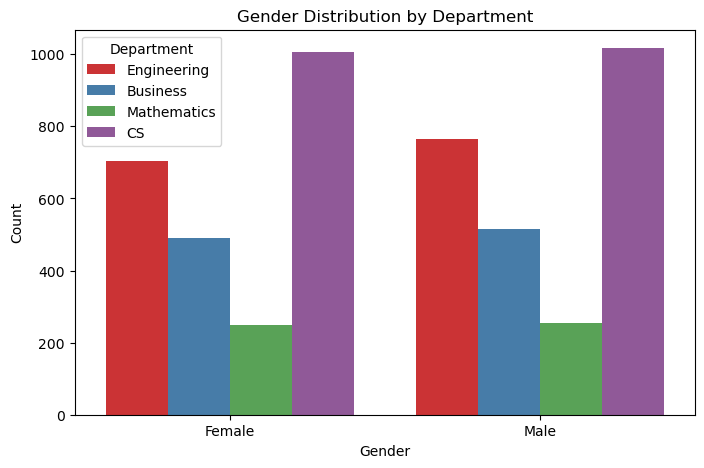

In [62]:
# Gender Distribution by Department
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Gender'], hue=df['Department'], palette="Set1")
plt.title("Gender Distribution by Department")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Department")
plt.show()

All departments have balanced gender distribution. CS and Engineering have the highest student counts, while Mathematics has the lowest. Engineering has slightly males than females.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\946206886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Attendance (%)'], palette="Set2")


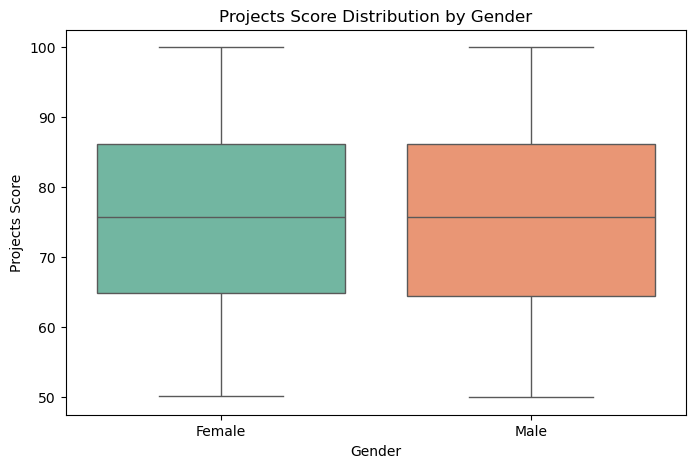

In [63]:
# Relationship between Projects_Score and Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Attendance (%)'], palette="Set2")
plt.title("Projects Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Projects Score")
plt.show()

Both genders have the same performance in projects.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\1752828858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Department'], y=df['Stress_Level (1-10)'], palette="Set3")


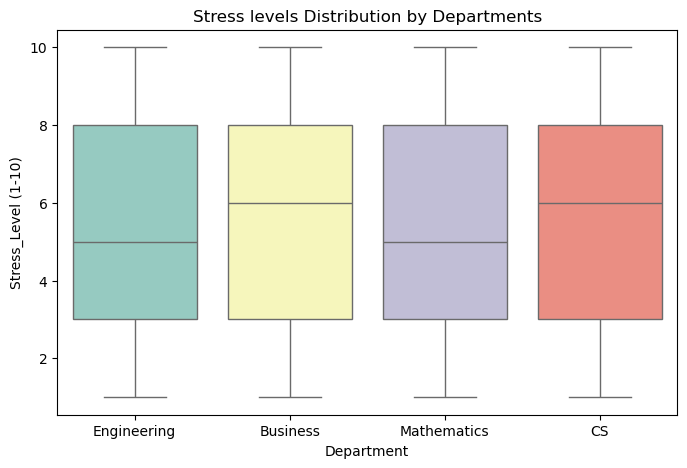

In [64]:
# Relationship between Department and stress level
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Department'], y=df['Stress_Level (1-10)'], palette="Set3")
plt.title("Stress levels Distribution by Departments")
plt.xlabel("Department")
plt.ylabel("Stress_Level (1-10)")
plt.show()

All departments causes similar stress levels. Most students have stress levels between 3 and 8, but some with extreme stress (10). No department has significantly higher or lower stress levels (no outliers).

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\2617746587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Stress_Level (1-10)'], palette="Set1")


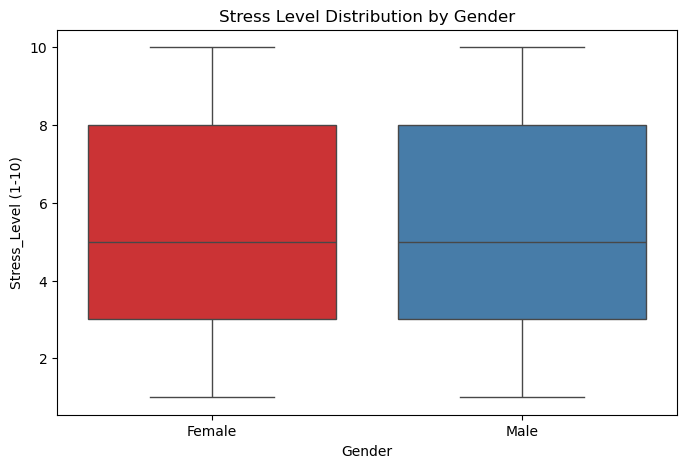

In [65]:
# Relationship between Gender and stress level
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Stress_Level (1-10)'], palette="Set1")
plt.title("Stress Level Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Stress_Level (1-10)")
plt.show()

Both genders experience similar stress levels. Both genders have students with very low and very high stress levels.

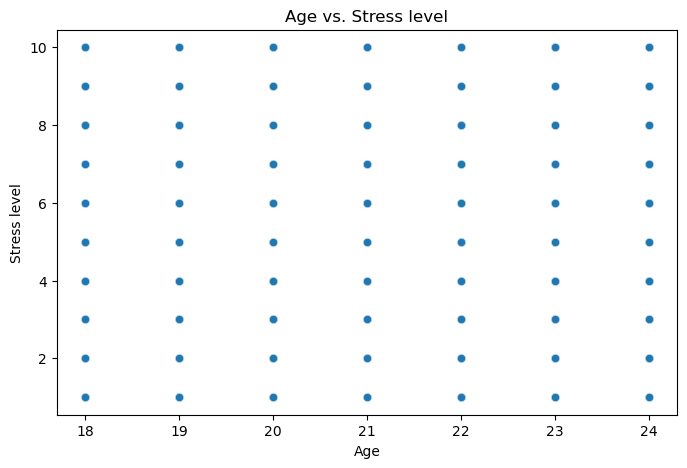

In [66]:
# Relationship between Age and Stress level
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Stress_Level (1-10)"], alpha=0.5)
plt.title("Age vs. Stress level")
plt.xlabel("Age")
plt.ylabel("Stress level")
plt.show()

No correlation. All ages have all the discrete levels of stress. Stress level doesn't depend on Age.

C:\Users\hp\AppData\Local\Temp\ipykernel_3952\1388510077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Participation_Score'], palette="Set2")


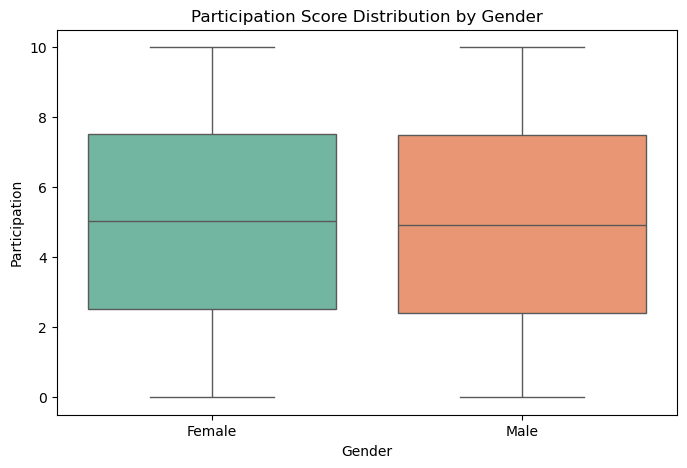

In [67]:
# Relationship between Gender and Participation score
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Participation_Score'], palette="Set2")
plt.title("Participation Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Participation")
plt.show()

Participation Scores for both genders are similar.

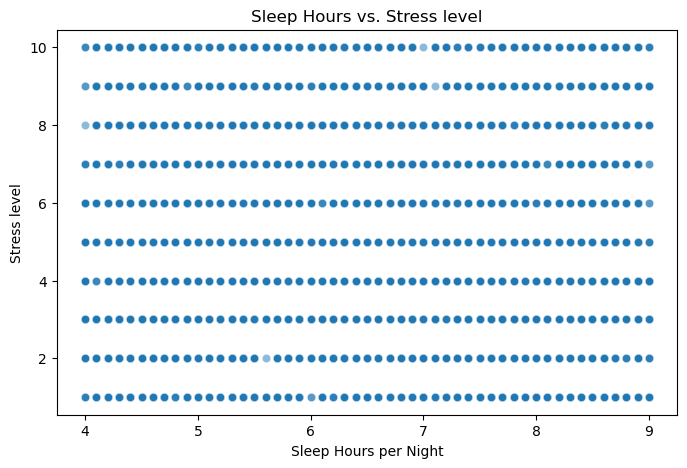

In [68]:
# Relationship between Sleep hours and Stress level
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sleep_Hours_per_Night"], y=df["Stress_Level (1-10)"], alpha=0.5)
plt.title("Sleep Hours vs. Stress level")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Stress level")
plt.show()

No correlation. Stress level doesn't depend on Sleep hours.